In [33]:
##STEP 2 Base line
import numpy
import pandas
from keras.models import Sequential
from keras.layers import Dense
import matplotlib.pyplot as plt
from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import StratifiedKFold
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline


In [2]:
# fix random seed for reproducibility
seed = 7
numpy.random.seed(seed)



In [3]:
##load dataset
dataframe = pandas.read_csv("sonar.csv",header=None)
dataset = dataframe.values



In [4]:
##split into input (x) and output (y) variable
X = dataset[:,0:60].astype(float)
Y = dataset[:,60]

In [5]:
X.shape

(208, 60)

In [6]:
## encode class values as integers
encoder = LabelEncoder()
encoder_Y = encoder.fit_transform(Y)

In [7]:
# baseline model
def create_baseline():
    # create model
    model = Sequential()
    model.add(Dense(60, input_shape=(60,), kernel_initializer='normal', activation='relu'))
    model.add(Dense(60, kernel_initializer='normal', activation='relu'))
    model.add(Dense(1, kernel_initializer='normal', activation='sigmoid'))
    # Compile model
    model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model

In [8]:
# evaluate model with standardized dataset
estimator = KerasClassifier(build_fn=create_baseline, epochs=100, batch_size=5, verbose=0)
kfold = StratifiedKFold(n_splits=10, shuffle=True, random_state=seed)
results = cross_val_score(estimator, X, encoder_Y, cv=kfold)
print("Results: %.2f%% (%.2f%%)" % (results.mean()*100, results.std()*100))


Results: 82.73% (4.79%)


In [9]:
# evaluate baseline model with standardized dataset
numpy.random.seed(seed)
estimators = []
estimators.append(('standardize', StandardScaler()))
estimators.append(('mlp', KerasClassifier(build_fn=create_baseline, epochs=100, batch_size=5, verbose=0)))
pipeline = Pipeline(estimators)
kfold = StratifiedKFold(n_splits=10, shuffle=True, random_state=seed)
results = cross_val_score(pipeline, X, encoder_Y, cv=kfold)
print("Standardized: %.2f%% (%.2f%%)" % (results.mean()*100, results.std()*100))


Standardized: 85.61% (8.51%)


# 4.1. Evaluate a Smaller Network

In [10]:
# smaller model
def create_smaller():
	# create model
	model = Sequential()
	model.add(Dense(30, input_dim=60, kernel_initializer='normal', activation='relu'))
	model.add(Dense(1, kernel_initializer='normal', activation='sigmoid'))
	# Compile model
	model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
	return model
estimators = []
estimators.append(('standardize', StandardScaler()))
estimators.append(('mlp', KerasClassifier(build_fn=create_smaller, epochs=120, batch_size=5, verbose=0)))
pipeline = Pipeline(estimators)
kfold = StratifiedKFold(n_splits=10, shuffle=True, random_state=seed)
results = cross_val_score(pipeline, X, encoder_Y, cv=kfold)
print("Smaller: %.2f%% (%.2f%%)" % (results.mean()*100, results.std()*100))

Smaller: 85.04% (7.70%)


# Step 4.2. Evaluate a Larger Network

In [11]:
# larger model
def create_larger():
	# create model
	model = Sequential()
	model.add(Dense(120, input_dim=60, kernel_initializer='normal', activation='relu'))
	model.add(Dense(30, kernel_initializer='normal', activation='relu'))
	model.add(Dense(1, kernel_initializer='normal', activation='sigmoid'))
	# Compile model
	model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
	return model
estimators = []
estimators.append(('standardize', StandardScaler()))
estimators.append(('mlp', KerasClassifier(build_fn=create_larger, epochs=130, batch_size=5, verbose=0)))
pipeline = Pipeline(estimators)
kfold = StratifiedKFold(n_splits=10, shuffle=True, random_state=seed)
results = cross_val_score(pipeline, X, encoder_Y, cv=kfold)
print("Larger: %.2f%% (%.2f%%)" % (results.mean()*100, results.std()*100))

Larger: 83.63% (7.84%)


# Step 5: Really Scaling up: developing a model that overfits

In [12]:
def overfit_model():
# tuning the  model
    model = Sequential()
    model.add(Dense(130, input_dim=60, kernel_initializer='normal', activation='relu'))
    model.add(Dense(110, kernel_initializer='initializer.random_normal()', kernal_regularizer='regularizers.l2(0.001)', activation='relu'))
    model.add(Dense(100, kernel_initializer='initializer.random_normal()', kernal_regularizer='regularizers.l2(0.001)', activation='relu'))
    model.add(Dese(70, kernal_initializer='initializer.ramdom_normal()', kernal_regularizer='regularizers.l2(0.001)', activation='relu'))
    model.add(Dense(50, kernal_initializer='initalizer.random_normal()', kernal_regularizer='regularizers.l2(0.001)', activation='relu'))
    model.add(Dense(30, kernal_initializer='initializer.random_normal()', kernal_regularizer='regularizers.l2(0.001)',activation='relu'))
    model.add(Dense(10, kernal_initializer='initialzer.random_normal()', kernal_regularizer='regularizers.l2(0.001)', activation='relu'))
    model.add(Dense(1, kernel_initializer='normal', activation='sigmoid'))
# Compile model
    model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model
estimators = []
estimators.append(('standardize', StandardScaler()))
estimators.append(('mlp', KerasClassifier(build_fn=create_larger, epochs=200, batch_size=5, verbose=0)))
pipeline = Pipeline(estimators)
kfold = StratifiedKFold(n_splits=10, shuffle=True, random_state=seed)
results = cross_val_score(pipeline, X, encoder_Y, cv=kfold)
print("Larger: %.2f%% (%.2f%%)" % (results.mean()*100, results.std()*100))

Larger: 84.13% (7.42%)


# Step 6: Tuning the model

In [13]:
from keras.regularizers import l2
def Tune_model():
    model = Sequential()
    model.add(Dense(60, kernel_initializer='normal', kernel_regularizer=l2(0.001), activation='relu',input_dim=60))
    model.add(Dense(40, kernel_initializer='normal', kernel_regularizer=l2(0.001), activation='relu',))
    model.add(Dense(20, kernel_initializer='normal', kernel_regularizer=l2(0.001), activation='relu',))
    model.add(Dense(1, kernel_initializer='normal', kernel_regularizer=l2(0.001), activation='sigmoid'))
    
    # Compile model
    model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model

estimators = []
estimators.append(('standardize', StandardScaler()))
estimators.append(('mlp', KerasClassifier(build_fn=Tune_model, epochs=155, batch_size=10, verbose=0)))
pipeline = Pipeline(estimators)
kfold = StratifiedKFold(n_splits=12, shuffle=True, random_state=seed)
results = cross_val_score(pipeline, X, encoder_Y, cv=kfold)
print("Tune Model: %.2f%% (%.2f%%)" % (results.mean()*100, results.std()*100))

Tune Model: 87.03% (6.12%)


# Step 7: Rewriting the code using the Keras Functional API

In [14]:
from keras import layers
from keras.regularizers import l2
from keras import models
def Function_API_Model():
    
    input_tensors = layers.Input(shape=(60,))
    a = layers.Dense(60, activation='relu')(input_tensors)
    b = layers.Dense(40, activation='relu', kernel_initializer='normal', kernel_regularizer=l2(0.001))(a)
    c = layers.Dense(20, activation='relu', kernel_initializer='normal', kernel_regularizer=l2(0.001))(b)
    output_tensor = layers.Dense(1, activation='sigmoid', kernel_initializer='normal', kernel_regularizer=l2(0.001))(c)

    model = models.Model(inputs=input_tensors, outputs=output_tensor)
    model.compile(optimizer="adam" , loss='binary_crossentropy', metrics=['accuracy'])
    return model
    
estimators = []
estimators.append(('standardize', StandardScaler()))
estimators.append(('mlp', KerasClassifier(build_fn=Function_API_Model, epochs=145, batch_size=10, verbose=0)))
pipeline = Pipeline(estimators)
kfold = StratifiedKFold(n_splits=12, shuffle=True, random_state=seed)
results = cross_val_score(pipeline, X, encoder_Y, cv=kfold)
print("Functional API Model: %.2f%% (%.2f%%)" % (results.mean()*100, results.std()*100))

Functional API Model: 85.12% (6.78%)


# Step 8: Rewriting the code by doing Model Subclassing

In [15]:
import tensorflow as tf

tf.__version__

'1.8.0'

In [16]:
import keras
import tensorflow as tf

class MyModel(tf.keras.Model):
    
        def __init__(self):
                        super(MyModel, self).__init__()
                        self.dense1 = layers.Dense(60, activation='relu')
                        self.dense2 = layers.Dense(30, activation='relu')
                        self.dense3 = layers.Dense(1, activation='sigmoid')

        def call(self, inputs):
                        x = self.dense1(inputs)
                        x = self.dense2(x)
                        return self.dense3(x)
    
model = MyModel()
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['acc'])
model.fit(X, encoder_Y, epochs=145, batch_size=4, verbose=False)

# Step 9: Rewriting the code without using scikit-learn

In [23]:
from keras import models
from keras import layers
from keras.regularizers import l2

def Tune_model():
    model = Sequential()
    model.add(Dense(60, kernel_initializer='normal', kernel_regularizer=l2(0.001), activation='relu',input_dim=60))
    model.add(Dense(40, kernel_initializer='normal', kernel_regularizer=l2(0.001), activation='relu',))
    model.add(Dense(20, kernel_initializer='normal', kernel_regularizer=l2(0.001), activation='relu',))
    model.add(Dense(1, kernel_initializer='normal', kernel_regularizer=l2(0.001), activation='sigmoid'))
    
    # Compile model
    model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model

In [24]:
# Shuffle the dataset before split in values and labels
numpy.random.shuffle(dataset) 
X = dataset[:,0:60].astype(float)
Y = dataset[:,60]

# encode class values in o and 1
label_encoder = LabelEncoder()
encoded_Y = label_encoder.fit_transform(Y)

# K-Fold
k = 6
num_val_samples = len(dataset) // k
val_acc_list = [] # used for validation data accuracy
val_loss_list = [] # used for Validation data loss

for fold in range(k):
    
    # Validation dataset
    val_data = X[fold * num_val_samples : (fold + 1) * num_val_samples]
    
    # Validation labels corresponding to the validation dataset
    val_label = encoded_Y[fold * num_val_samples : (fold + 1) * num_val_samples]
    
    
    # Training Dataset
    partial_train_data = numpy.concatenate([X[:fold * num_val_samples],
                                         X[(fold + 1) * num_val_samples:]],
                                        axis=0)
     # Training labels corresponding to the training dataset
    partial_train_label = numpy.concatenate([encoded_Y[:fold * num_val_samples],
                                          encoded_Y[(fold + 1) * num_val_samples:]],
                                         axis=0)
    
    model = Tune_model()
    result = model.fit(partial_train_data, partial_train_label, epochs=200, batch_size=29, verbose=0)
    val_loss, val_acc = model.evaluate(val_data, val_label, verbose=0)
    val_loss_list.append(val_loss)
    val_acc_list.append(val_acc)

In [25]:
val_acc_list, val_loss_list

([0.79411764705882348,
  0.76470588235294112,
  0.8529411764705882,
  0.6470588235294118,
  0.76470588235294112,
  0.82352941176470584],
 [0.76750751234152736,
  0.79424816983587598,
  0.48462014689165001,
  1.9166181223357426,
  0.57355087995529175,
  0.51159156420651608])

In [27]:

numpy.mean(val_acc_list)

0.77450980392156854

In [31]:
# Shuffle the dataset before split in values and labels
numpy.random.shuffle(dataset) 
X = dataset[:,0:60].astype(float)
Y = dataset[:,60]

# encode class values in o and 1
label_encoder = LabelEncoder()
encoded_Y = label_encoder.fit_transform(Y)

# K-Fold
k = 6
num_val_samples = len(dataset) // k
val_acc_list = [] # used for validation data accuracy
val_loss_list = [] # used for Validation data loss

for fold in range(k):
    
    # Validation dataset
    val_data = X[fold * num_val_samples : (fold + 1) * num_val_samples]
    
    # Validation labels corresponding to the validation dataset
    val_label = encoded_Y[fold * num_val_samples : (fold + 1) * num_val_samples]
     # Training Dataset
    partial_train_data = numpy.concatenate([X[:fold * num_val_samples],
                                         X[(fold + 1) * num_val_samples:]],
                                        axis=0)
    
    # Training labels corresponding to the training dataset
    partial_train_label = numpy.concatenate([encoded_Y[:fold * num_val_samples],
                                          encoded_Y[(fold + 1) * num_val_samples:]],
                                         axis=0)
    
    model = Tune_model()
    result = model.fit(partial_train_data, partial_train_label, epochs=200, batch_size=29, verbose=0, 
                       validation_data=(val_data, val_label))

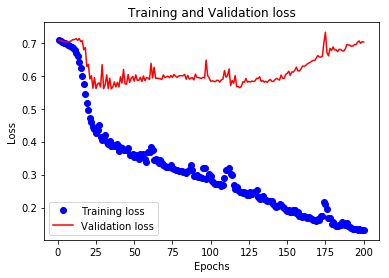

In [34]:
acc = result.history['acc']
loss = result.history['loss']
val_loss = result.history['val_loss']

epochs = range(1, len(acc)+1)

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and Validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

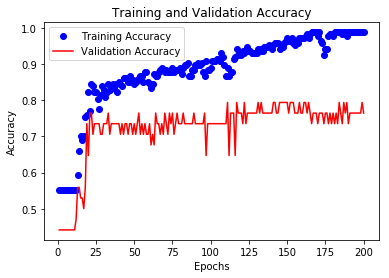

In [35]:
plt.clf()

loss = result.history['acc']
val_loss = result.history['val_acc']

epochs = range(1, len(acc)+1)

plt.plot(epochs, loss, 'bo', label='Training Accuracy')
plt.plot(epochs, val_loss, 'r', label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()